# Conceptual
## 1. Explain the differences between bagging and boosting and explain how machine
learning methods in general use these strategies to build robust models using tree
models?


###  **Bagging (Bootstrap Aggregating)**

**Main idea:**
Bagging builds multiple independent models on bootstrapped (random with replacement) subsets of the training data and averages their predictions (regression) or takes a majority vote (classification).

**Key characteristics:**

* **Parallel** learning: All trees are built independently.
* **Reduces variance**: Averaging over many trees cancels out fluctuations caused by random noise in the data.
* **Each model sees a different subset of the data**, but the same learning algorithm is applied.

**In tree models:**

* Bagging creates many full decision trees and combines their predictions.
* Random Forests are an extension of bagging where each split only considers a random subset of predictors to further reduce correlation between trees.

---

### **Boosting**

**Main idea:**
Boosting builds trees sequentially, where each new tree tries to correct the errors of the previous one by focusing more on the misclassified or badly predicted samples.

**Key characteristics:**

* **Sequential** learning: Each tree depends on the previous ones.
* **Reduces bias and variance**: Later trees improve model accuracy by learning from residuals.
* **Weights are adjusted** on the training samples, increasing attention to difficult cases.
* Includes hyperparameters:

  * `B`: number of trees
  * `λ`: learning rate or shrinkage parameter
  * `d`: maximum depth (interaction level)

**In tree models:**

* Trees are shallow .
* Each tree is fit on the residuals of the previous model (in regression) or misclassified points (in classification).

##  What are the main differences between Random Forests and AdaBoost regarding how
the base learners are trained, how samples are weighted, how predictions are made and
how robust are they regarding overfitting?

### **Random Forests**

**Main idea:**
Random Forests combine many independently trained decision trees to make robust predictions by averaging (regression) or majority voting (classification). They introduce randomness both in the data and in the feature selection process during training.

**Key characteristics:**

* **Parallel training**: All trees are trained at the same time on different bootstrapped samples of the data.
* **No sample weighting**: Each training example is treated equally throughout all trees.
* **Random feature selection**: At each split in a tree, only a random subset of features is considered, reducing the correlation between trees.
* **Prediction**: Every tree contributes equally to the final output (majority vote or average).
* **Robustness to overfitting**: Generally good. By averaging over many diverse trees, Random Forests reduce variance and tend not to overfit, especially with enough trees and proper tuning.



---

### **AdaBoost (Adaptive Boosting)**

**Main idea:**
AdaBoost builds decision trees in sequence, where each tree focuses on correcting the mistakes made by the previous ones. It adjusts the weight of training samples so that misclassified points get more attention in the next tree.

**Key characteristics:**

* **Sequential training**: Trees are added one after another, each improving on the previous.
* **Sample weighting**: After each round, training samples that were misclassified get higher weights, so future trees focus on them.
* **No random feature selection**: All features can be used at each split, with emphasis driven by sample weights.
* **Prediction**: Trees contribute unequally; better-performing trees have more influence in the final prediction.
* **Robustness to overfitting**: More sensitive. Since AdaBoost emphasizes difficult (and possibly noisy) samples, it can overfit if too many trees are used or if the trees are too deep.

Reference:Lecture 7



# Practical
Overview of the steps
1. Load the data and get an overview of the data
2. Learn and assess Classification Trees
3. Learn and assess Regression Trees
4. Learn and assess Regression Bagging (Trees) and Random Forests
5. Learn and assess Regression Boosting (Trees)
Steps in detail
## Load the data and get an overview of the data

In [2]:
import pandas as pd
df = pd.read_csv("dataset/Carseats.csv", index_col=0)

Display the number of predictors and possible responses and their names:


In [3]:
print(df.shape[1])
print(df.columns.tolist())

11
['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


Print a statistic summary of the predictors and responses:

In [4]:
print(df.describe(include='all'))

             Sales   CompPrice      Income  Advertising  Population  \
count   400.000000  400.000000  400.000000   400.000000  400.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean      7.496325  124.975000   68.657500     6.635000  264.840000   
std       2.824115   15.334512   27.986037     6.650364  147.376436   
min       0.000000   77.000000   21.000000     0.000000   10.000000   
25%       5.390000  115.000000   42.750000     0.000000  139.000000   
50%       7.490000  125.000000   69.000000     5.000000  272.000000   
75%       9.320000  135.000000   91.000000    12.000000  398.500000   
max      16.270000  175.000000  120.000000    29.000000  509.000000   

             Price ShelveLoc         Age   Education Urban   US  
count   400.000000       400  400.000000  400.000000   400  400  
unique         

Display the number of data points:


In [5]:
print(df.shape[0])

400


Display the data in a table (subset of rows is sufficient):


In [6]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1   9.50        138      73           11         276    120       Bad   42   
2  11.22        111      48           16         260     83      Good   65   
3  10.06        113      35           10         269     80    Medium   59   
4   7.40        117     100            4         466     97    Medium   55   
5   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
1         17   Yes  Yes  
2         10   Yes  Yes  
3         12   Yes  Yes  
4         14   Yes  Yes  
5         13   Yes   No  


Compute the pairwise correlation of the predictors in the data set.


Quantitative columns: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

--- r matrix ---
             Sales  CompPrice  Income  Advertising  Population  Price   Age  \
Sales         1.00       0.06    0.15         0.27        0.05  -0.44 -0.23   
CompPrice     0.06       1.00   -0.08        -0.02       -0.09   0.58 -0.10   
Income        0.15      -0.08    1.00         0.06       -0.01  -0.06 -0.00   
Advertising   0.27      -0.02    0.06         1.00        0.27   0.04 -0.00   
Population    0.05      -0.09   -0.01         0.27        1.00  -0.01 -0.04   
Price        -0.44       0.58   -0.06         0.04       -0.01   1.00 -0.10   
Age          -0.23      -0.10   -0.00        -0.00       -0.04  -0.10  1.00   
Education    -0.05       0.03   -0.06        -0.03       -0.11   0.01  0.01   

             Education  
Sales            -0.05  
CompPrice         0.03  
Income           -0.06  
Advertising      -0.03  
Population       -0.11  
Price  

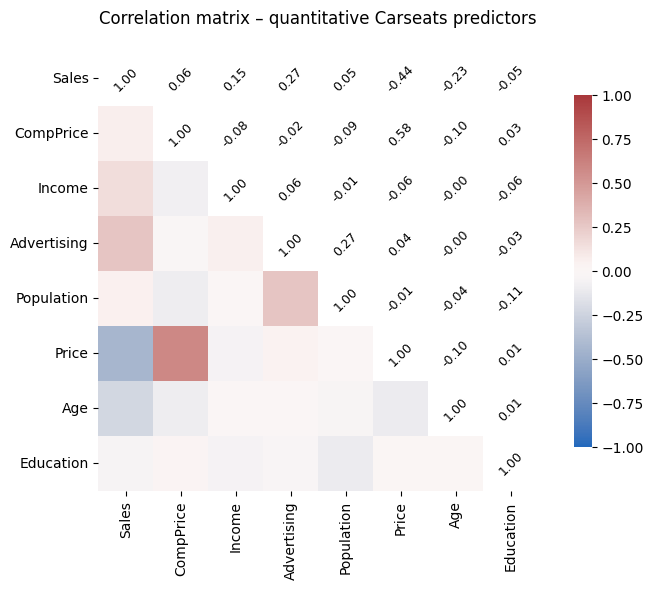

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns          # for the heat-map
import matplotlib.pyplot as plt
from scipy import stats         # Pearson r & p-values

# ------------------------------------------------------------------
# 1. Load data and keep only quantitative predictors
# ------------------------------------------------------------------
df = pd.read_csv("dataset/Carseats.csv", index_col=0)

quant_df = df.drop(columns=['ShelveLoc', 'Urban', 'US'])
print("Quantitative columns:", quant_df.columns.tolist())

# ------------------------------------------------------------------
# 2. Correlation coefficients (r)
# ------------------------------------------------------------------
r_mat = quant_df.corr(method='pearson')
print("\n--- r matrix ---")
print(r_mat.round(2))

# ------------------------------------------------------------------
# 3. Corresponding p-values
# ------------------------------------------------------------------
def corr_pvalues(data):
    cols = data.columns
    p = pd.DataFrame(np.ones((len(cols), len(cols))),
                     columns=cols, index=cols)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            _, pval = stats.pearsonr(data.iloc[:, i], data.iloc[:, j])
            p.iloc[i, j] = pval
            p.iloc[j, i] = pval
    return p

p_mat = corr_pvalues(quant_df)
print("\n--- p-value matrix ---")
print(p_mat.map(lambda x: f"{x:.3g}"))

# ------------------------------------------------------------------
# 4. Significance symbols (like rquery.cormat)
# ------------------------------------------------------------------
def star(p):
    if   p < 0.001: return '***'
    elif p < 0.01:  return '**'
    elif p < 0.05:  return '*'
    elif p < 0.10:  return '.'
    else:           return ' '

sym_mat = p_mat.map(star)
print("\n--- significance symbols ---")
print(sym_mat)

# ------------------------------------------------------------------
# 5. Heat-map (lower triangle for colours, upper for numbers)
# ------------------------------------------------------------------
mask = np.triu(np.ones_like(r_mat, dtype=bool))  # mask upper triangle
fig, ax = plt.subplots(figsize=(8, 6))

# Lower triangle: coloured heat-map
sns.heatmap(r_mat,
            mask=mask,
            cmap="vlag",          # diverging palette centred at 0
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .8},
            square=True,
            ax=ax,
            annot=False)

# Upper triangle: correlation numbers
for i in range(r_mat.shape[0]):
    for j in range(i, r_mat.shape[1]):       # upper triangle incl. diag
        text = f"{r_mat.iloc[i,j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text,
                ha='center', va='center', fontsize=9, rotation=45)

ax.set_title("Correlation matrix – quantitative Carseats predictors",
             pad=20)
plt.tight_layout()
plt.show()


Plot the response to its most correlated predictor.


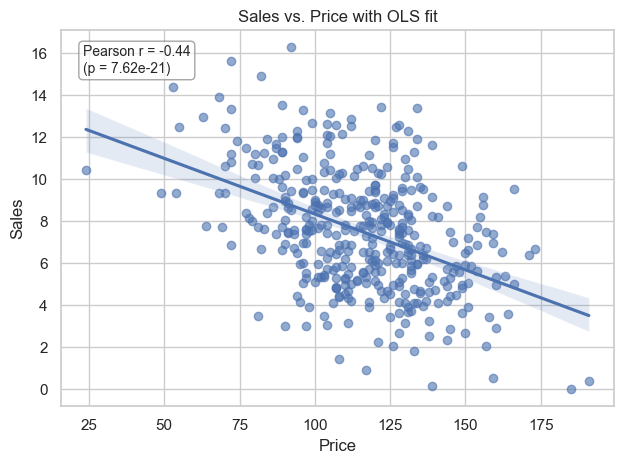

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


x_var = "Price"
y_var = "Sales"

r, p = pearsonr(df[y_var], df[x_var])


sns.set_theme(style="whitegrid")
ax = sns.regplot(
        data=df,
        x=x_var, y=y_var,
        ci=95,
        scatter_kws={'alpha': 0.6})


ax.text(0.04, 0.96,
        f"Pearson r = {r:.2f}\n(p = {p:.3g})",
        transform=ax.transAxes,
        ha='left', va='top', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="gray", alpha=0.7))

ax.set_xlabel("Price")
ax.set_ylabel("Sales")
ax.set_title("Sales vs. Price with OLS fit")
plt.tight_layout()
plt.show()




### 1. Which predictors relate to **Sales**?

* **Price**: The strongest relationship. Correlation is around **−0.44** — as price goes up, sales go down. Strongly statistically significant and practically meaningful.
* **Advertising**: Moderate positive relationship (**+0.27**). More local ad spending tends to boost sales, but not as much as lowering the price.
* **Age**: Slight negative relationship (**−0.23**). Newer stores seem to sell more than older ones.
* **Income**: Weak positive correlation (**+0.15**). Higher-income areas might have slightly better sales, but it’s not a dominant factor.
* **Other variables** like **Population**, **CompPrice**, and **Education** have very weak or no meaningful relationships with Sales in this data.

---

### 2. Visual check – *Sales vs Price* scatter

The scatterplot backs up the stats: there’s a clear downward trend. As Price increases, Sales decrease. The confidence band around the regression line confirms that this trend is reliable — especially where data points are dense (in the mid-price range). their is alot of variation and outliers, especially at low prices with high sales, which could be due to discounts or promotions.

---

### 3. Relationships among predictors (multicollinearity clues)

Price and CompPrice (competitor pricing) are fairly correlated — around **+0.58** — so they tend to rise and fall together. That’s something to watch for in a regression model, since it might inflate standard errors.

Other predictor-predictor correlations are low to moderate. There’s no strong multicollinearity across the rest, which is good news for modeling.

---

### 4. Business/story implications

* **Price sensitivity is strong** — lowering price boosts sales considerably. This should be the first lever to explore for increasing units sold, though it may affect profit margins.
* **Advertising works** — not as powerful as price, but still effective. It could be a smart investment, especially where prices can’t be changed.
* **Newer stores perform better** — possibly due to better locations, store layout, or buzz. Older stores may need refreshment or strategic support.
* **Demographics matter less** — things like income, education, and local population don’t show much influence on sales, at least not directly.


## Learn and assess Classification Trees

Predict that the Sales is high using the predictors.
As Sales is a quantitative variable, we begin by recoding it as a binary variable.


In [9]:


# Load dataset (if not already in memory)
df = pd.read_csv("dataset/Carseats.csv", index_col=0)

# Create binary column: 'Yes' if Sales > 8, else 'No'
df['High'] = df['Sales'].apply(lambda x: 'Yes' if x > 8 else 'No')

# Confirm column added
print(df.columns.tolist())


['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'High']


Features used: ['Advertising', 'Age', 'CompPrice', 'Education', 'Income', 'Population', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'US_Yes', 'Urban_Yes']
Number of terminal nodes: 61
Tree depth: 11
Misclassification error rate: 0.00


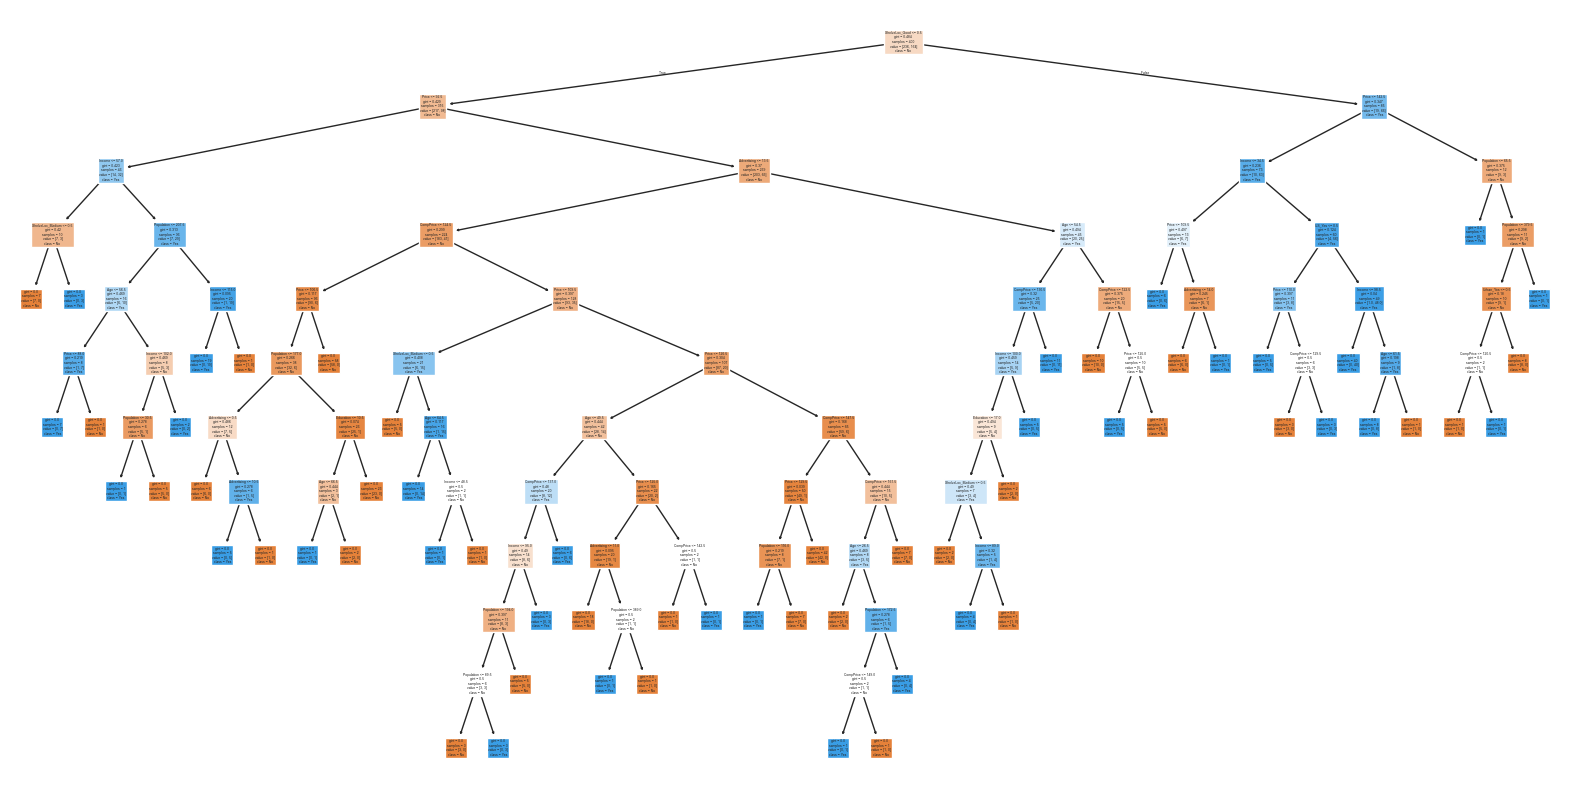

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df_tree = df.drop(columns='Sales')

df_encoded = pd.get_dummies(df_tree, drop_first=True)


X = df_encoded.drop(columns='High_Yes')
y = df_encoded['High_Yes']

tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X, y)


features_used = [X.columns[i] for i in tree_model.tree_.feature if i != -2]
print("Features used:", sorted(set(features_used)))
print("Number of terminal nodes:", tree_model.get_n_leaves())
print("Tree depth:", tree_model.get_depth())


y_pred = tree_model.predict(X)
misclassification_rate = (y != y_pred).mean()
print(f"Misclassification error rate: {misclassification_rate:.2f}")


plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()




## Interpretation: Classification Tree

to predict whether `Sales` is **High** or **Not** based on other product and store features. Since `Sales` is originally a continuous variable, we first converted it into a **binary categorical** variable (`High`), where:

* `"Yes"` if `Sales > 8`
* `"No"` otherwise

This allowed us to apply **classification tree models** instead of regression.


### Results

* **Features used:**
  The model selected 11 features from the data to perform splits:

  * Continuous: `Advertising`, `Age`, `CompPrice`, `Education`, `Income`, `Population`, `Price`
  * Categorical (dummies): `ShelveLoc_Good`, `ShelveLoc_Medium`, `US_Yes`, `Urban_Yes`

* **Number of terminal nodes (leaves):** 61
  This indicates a fairly complex tree with many branches and decision outcomes.

* **Tree depth:** 11
  The tree is relatively deep, suggesting a high level of granularity in decision-making.

* **Misclassification error rate:** 0.00
  The model perfectly classifies the training data.While this looks impressive, it likely indicates **overfitting**. The model memorizes the training set but may not generalize well to unseen data. We'll need cross-validation or test data evaluation later to assess true performance.


### from the plot

* Nodes contain splitting rules and class distribution.
* Colors indicate predicted class (blue for `"No"`, orange for `"Yes"`).
* Tree branches reflect decision paths based on feature thresholds.



In order to properly evaluate the performance of a classification tree on these data, we must
estimate the test error rather than simply computing the training error. We split the
observations into a training set and a test set, build the tree using the training set, and
evaluate its performance on the test data.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score



# Split into training and testing (200 training samples)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=200, random_state=1
)

# Train the classification tree on the training set
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = tree_model.predict(X_test)

# Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Test Accuracy: {accuracy:.3f}")


Confusion Matrix:
[[86 33]
 [32 49]]
Test Accuracy: 0.675




### Evaluate the performance of the classification tree on a test set

last tree used the **entire dataset**, and the model achieved a **training misclassification error of 0.00** as i suspected it was over fitted.
this one was tested on **unseen data**

#### Test Accuracy: **67.5%**

#### Interpretation:

* The model now correctly classifies **135 out of 200** test observations.
* Accuracy dropped from **100% on training** to **67.5% on test**, which reflects a **more realistic estimate** of how the model performs on new data.
* This drop confirms the earlier suspicion of overfitting: the tree captured the **training-specific patterns** too precisely, which don't always apply to new examples.
* In particular, the model misclassified:

  * 33 `"No"` cases as `"Yes"` (false positives)
  * 32 `"Yes"` cases as `"No"` (false negatives)


Pruning the tree might lead to improved results.

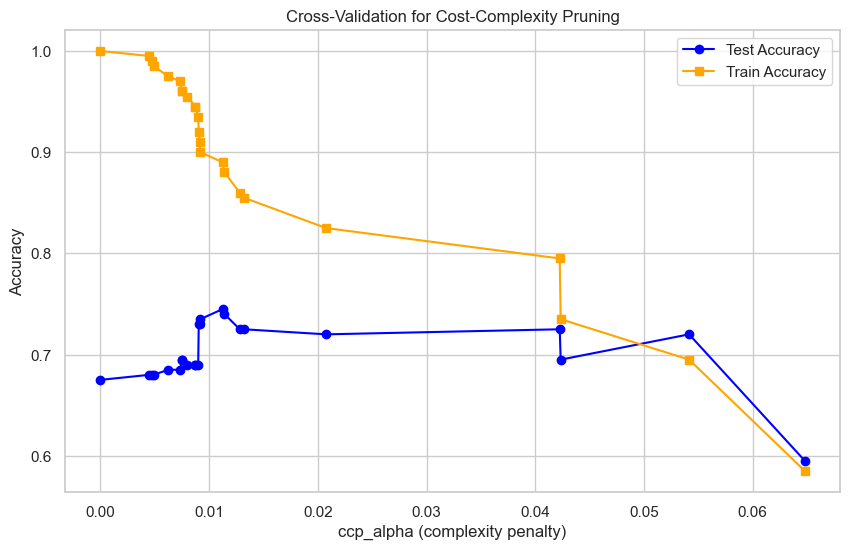

In [12]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=200, random_state=1
)

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    clfs.append(model)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', color='blue')
plt.plot(ccp_alphas, train_scores, marker='s', label='Train Accuracy', color='orange')
plt.xlabel("ccp_alpha (complexity penalty)")
plt.ylabel("Accuracy")
plt.title("Cross-Validation for Cost-Complexity Pruning")
plt.legend()
plt.grid(True)
plt.show()


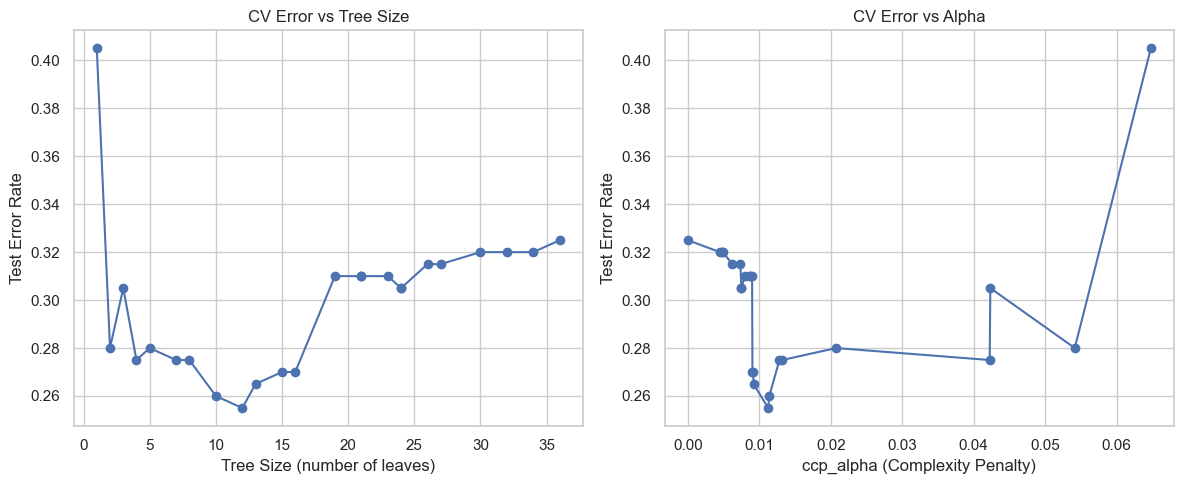

In [13]:
import matplotlib.pyplot as plt

# Get number of leaves (tree size) for each model
tree_sizes = [clf.get_n_leaves() for clf in clfs]

# Plot error (1 - accuracy) vs. tree size
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tree_sizes, [1 - score for score in test_scores], marker='o', linestyle='-')
plt.xlabel("Tree Size (number of leaves)")
plt.ylabel("Test Error Rate")
plt.title("CV Error vs Tree Size")

# Plot error vs complexity parameter (alpha)
plt.subplot(1, 2, 2)
plt.plot(ccp_alphas, [1 - score for score in test_scores], marker='o', linestyle='-')
plt.xlabel("ccp_alpha (Complexity Penalty)")
plt.ylabel("Test Error Rate")
plt.title("CV Error vs Alpha")

plt.tight_layout()
plt.show()




## Interpretation: Cross-Validation for Cost-Complexity Pruning

### 1. **Train vs Test Accuracy Plot**

This shows **accuracy** for both training and test sets as a function of `ccp_alpha`.

* The training accuracy starts at **1.0** (perfect fit) and decreases as the tree is pruned more aggressively (larger `ccp_alpha` values).
* The test accuracy, however, **peaks around `ccp_alpha ≈ 0.01`**, where generalization is best.
* Beyond that point, test accuracy starts to decline, indicating **underfitting** — the tree becomes too simple and can’t capture enough structure.

---

### 2. **Cross-Validation Error Plots**

**Left: CV Error vs Tree Size**
This plot shows how test error varies with the number of terminal nodes in the tree.

* Test error initially decreases as tree size increases.
* It reaches a minimum at around **10–12 leaves**, where the model captures important patterns.
* After that, the test error rises, showing that larger trees begin to **overfit**.

**Right: CV Error vs Alpha (`ccp_alpha`)**
This plot complements the one above by showing the same test error behavior in terms of the pruning parameter.

* Minimum test error is observed at **`ccp_alpha ≈ 0.01`** — aligning with the earlier graph.
* Very small or very large `ccp_alpha` values lead to worse performance, reflecting the bias-variance tradeoff.

---

### final interputation:

* The best-performing tree has about **10–12 terminal nodes** and corresponds to a `ccp_alpha` around **0.01**.


Now we are ready to prune the tree according to our findings and plot the pruned tree.


Confusion Matrix (Pruned Tree):
[[98 21]
 [32 49]]
Test Accuracy: 0.735


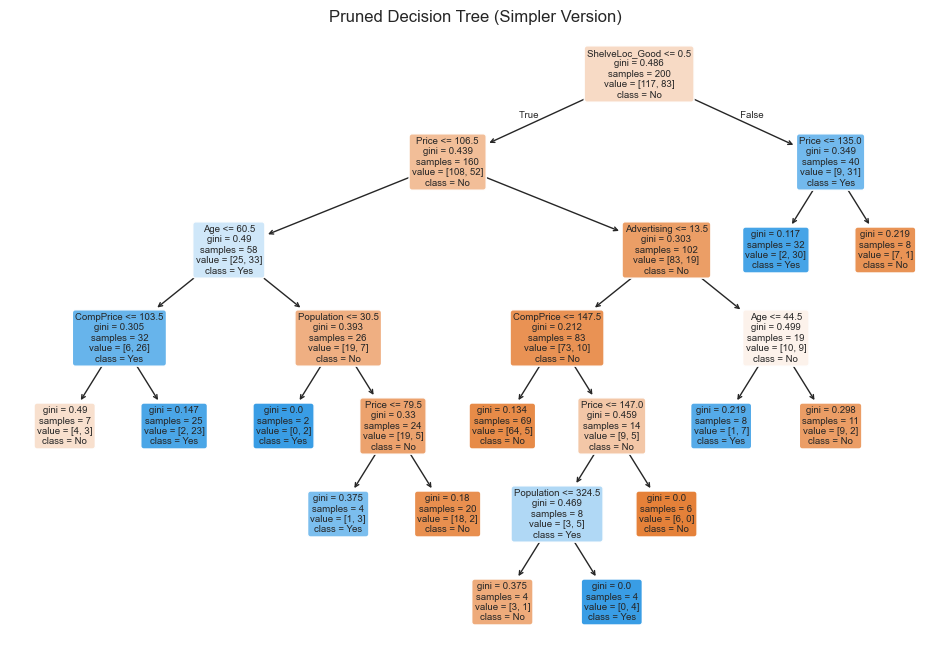

In [14]:
# Use the best alpha based on earlier CV results
optimal_alpha = 0.01 
pruned_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)


y_pred_pruned = pruned_tree.predict(X_test)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

print("Confusion Matrix (Pruned Tree):")
print(conf_matrix_pruned)
print(f"Test Accuracy: {accuracy_pruned:.3f}")

plt.figure(figsize=(12, 8))
plot_tree(
    pruned_tree,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Pruned Decision Tree (Simpler Version)")
plt.show()


Confusion Matrix (Larger Pruned Tree):
[[86 33]
 [32 49]]
Test Accuracy: 0.675


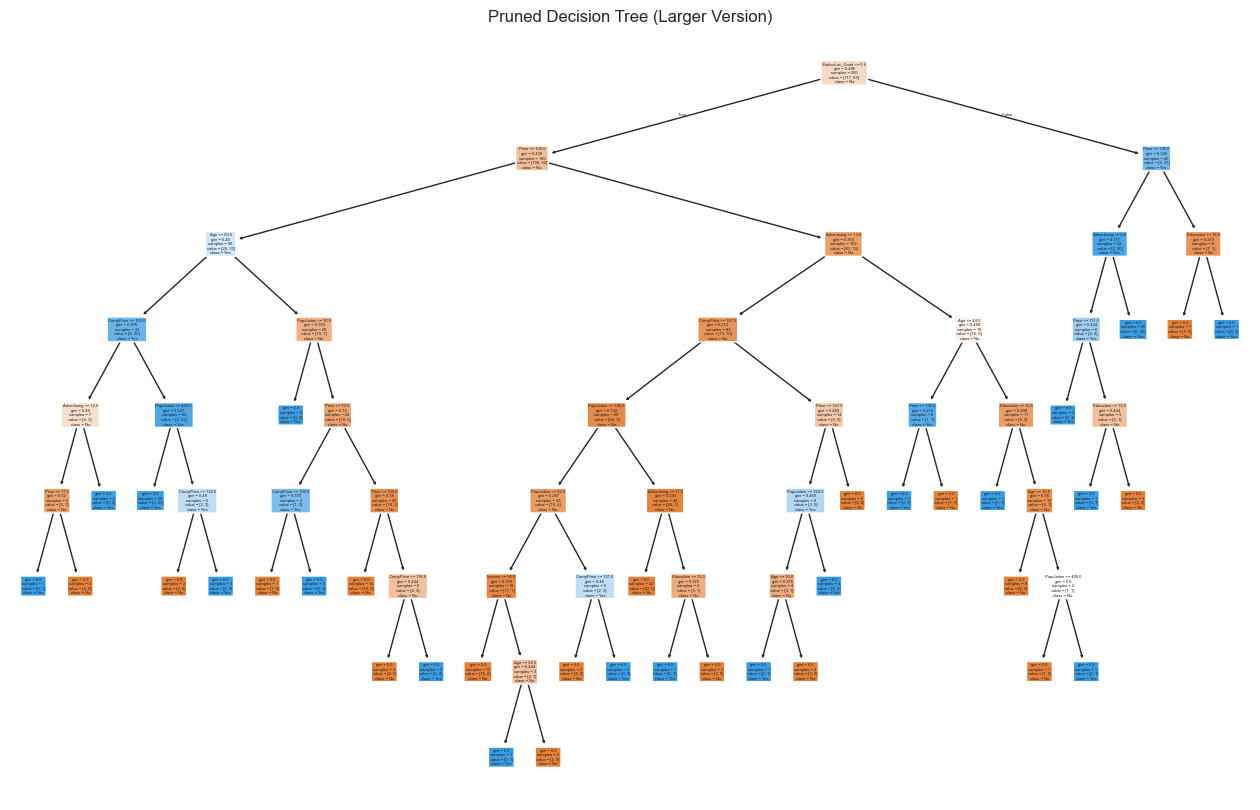

In [15]:
# Use a smaller alpha = less aggressive pruning
larger_tree_alpha = 0.002  # Use a lower alpha to retain more complexity
larger_pruned_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=larger_tree_alpha)
larger_pruned_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_larger = larger_pruned_tree.predict(X_test)
conf_matrix_larger = confusion_matrix(y_test, y_pred_larger)
accuracy_larger = accuracy_score(y_test, y_pred_larger)

print("Confusion Matrix (Larger Pruned Tree):")
print(conf_matrix_larger)
print(f"Test Accuracy: {accuracy_larger:.3f}")

# Visualize the larger tree
plt.figure(figsize=(16, 10))
plot_tree(
    larger_pruned_tree,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Pruned Decision Tree (Larger Version)")
plt.show()



### Pruned Decision Trees: Comparison of Complexity and Performance

Following the results of cross-validation, we pruned the original classification tree using two different complexity levels:

1. A **simpler tree** with fewer terminal nodes (via `ccp_alpha ≈ 0.01`)
2. A **larger pruned tree** (via smaller `ccp_alpha ≈ 0.002`) that retains more structure

---

#### 🧩 Simpler Pruned Tree

- **Test Accuracy**: **73.5%** This supports the idea that moderate pruning improves generalization by reducing overfitting.




#### 🧱 Larger Pruned Tree

- **Test Accuracy**: **67.5%** The additional branches likely captured noise from the training data rather than meaningful patterns — a classic sign of **overfitting**.



###  Interpretation 


- **Pruning with an appropriate `ccp_alpha`** leads to better generalization.
- The simpler tree is not only more accurate on unseen data, but also easier to explain and interpret — a desirable trait in many real-world applications.


## Learn and assess Regression Trees
Recall the Boston data set from Assignments 2 and 3. Check the details of this data set
and load it.


In [16]:

df_boston = pd.read_csv("dataset/Boston.csv", index_col=0)

Features used: ['rm', 'lstat', 'crim', 'age']
Number of terminal nodes: 7
Residual mean deviance (MSE): 13.657246074570017


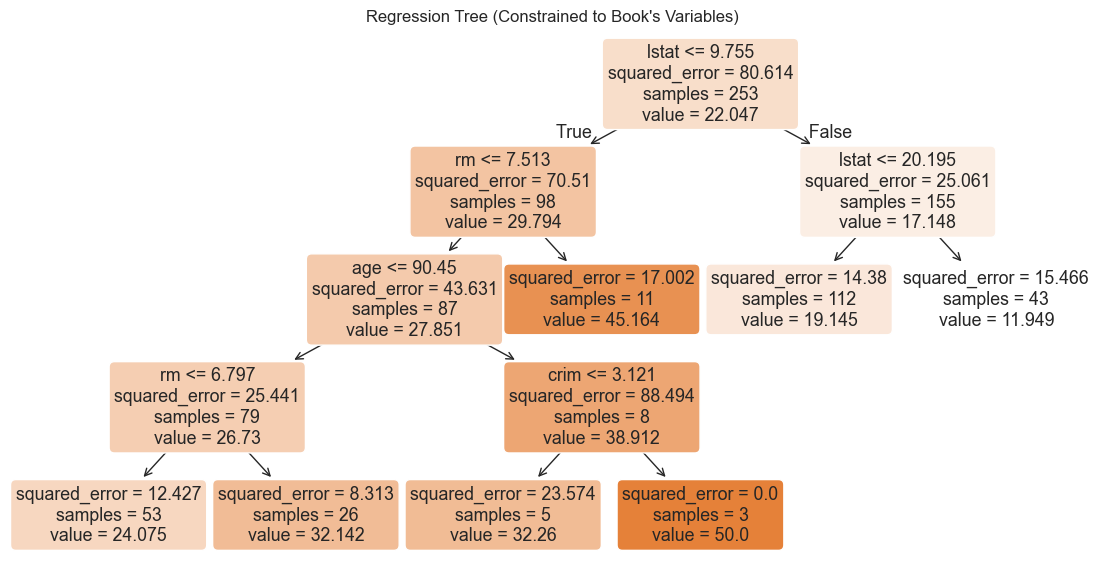

In [17]:
# Split the data: 50% train, 50% test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Split the dataset (if not already done)
train_df, _ = train_test_split(df_boston, train_size=0.5, random_state=1)

# Define full training features and target
X_train = train_df.drop(columns='medv')
y_train = train_df['medv']

selected_features = ['rm', 'lstat', 'crim', 'age']

X_train_selected = X_train[selected_features]

reg_tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=7)
reg_tree.fit(X_train_selected, y_train)

# Output info
features_used = [X_train_selected.columns[i] for i in np.unique(reg_tree.tree_.feature) if i != -2]
print("Features used:", features_used)
print("Number of terminal nodes:", reg_tree.get_n_leaves())
print("Residual mean deviance (MSE):", np.mean((y_train - reg_tree.predict(X_train_selected)) ** 2))

# Plot tree
plt.figure(figsize=(14, 7))
plot_tree(reg_tree, feature_names=selected_features, filled=True, rounded=True)
plt.title("Regression Tree (Constrained to Book's Variables)")
plt.show()




### Interpretation:

* The tree first splits on **`lstat`**, indicating that the percentage of lower-status population is the most influential variable in predicting home value.
* Subsequent splits use **`rm`, `age`, and `crim`**, showing their roles in refining the prediction.
* Nodes predict different average house values (`value = ...`) depending on the path, with more homogeneous groups having lower squared error.
* One terminal node (bottom right) even predicts a constant value of **50.0**, which is the capped maximum in the dataset — suggesting a cluster of very high-value homes.

* Is **interpretable**, with only a few variables and a clear structure.
* Shows how simple models can capture essential trends in the data without overfitting.


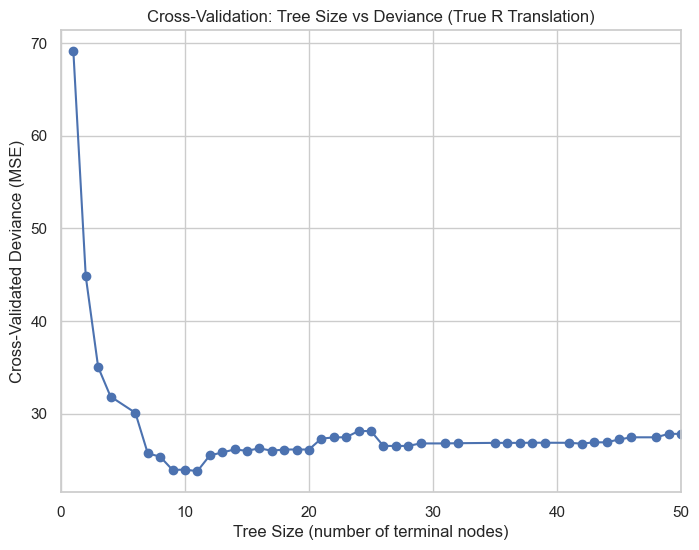

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Use the full unpruned tree to generate alphas
full_tree = DecisionTreeRegressor(random_state=1)
full_tree.fit(X_train_selected, y_train)

path = full_tree.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas

cv_errors = []

# For each alpha, fit a pruned tree and evaluate with cross-validation
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=1, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train_selected, y_train,
                             cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))  # Convert negative MSE to positive

# Plot equivalent to R: tree size vs CV deviance
sizes = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=1, ccp_alpha=alpha)
    model.fit(X_train_selected, y_train)
    sizes.append(model.get_n_leaves())

plt.figure(figsize=(8, 6))
plt.plot(sizes, cv_errors, marker='o', linestyle='-')
plt.xlabel("Tree Size (number of terminal nodes)")
plt.ylabel("Cross-Validated Deviance (MSE)")
plt.title("Cross-Validation: Tree Size vs Deviance (True R Translation)")
plt.xlim(0, 50)
plt.grid(True)
plt.show()





###  Interpretation:

* The error drops sharply as tree size increases from **1 to \~8 nodes**, meaning early splits capture substantial predictive power.
* The **minimum deviance is reached at around 8–10 nodes**, suggesting this is the optimal complexity.
* Beyond this point, the error **starts to increase or plateau**, indicating **overfitting** — larger trees are fitting noise in the training data rather than useful patterns.
* There's some local fluctuation (wiggles), but the overall shape confirms that a **small-to-moderate tree** performs best under cross-validation.


Best ccp_alpha: 0.7878695159129512


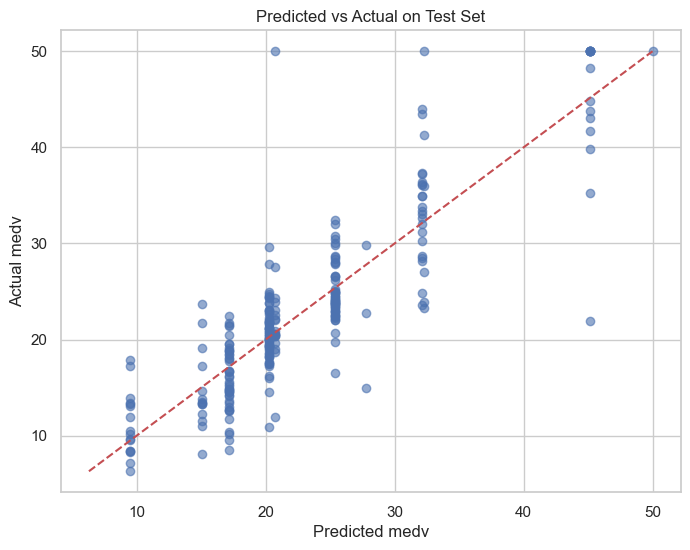

Test MSE: 21.118


In [19]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

best_index = np.argmin(cv_errors)
best_alpha = ccp_alphas[best_index]
print(f"Best ccp_alpha: {best_alpha}")

best_tree = DecisionTreeRegressor(random_state=1, ccp_alpha=best_alpha)
best_tree.fit(X_train_selected, y_train)

test_df = df_boston.drop(train_df.index)
X_test = test_df[selected_features]
y_test = test_df['medv']

y_pred = best_tree.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.title("Predicted vs Actual on Test Set")
plt.grid(True)
plt.show()

test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.3f}")



### Final Evaluation: Test Performance of the Pruned Regression Tree

Based on the results of cross-validation, i selected the best-pruned tree using the optimal complexity parameter:

* **Best `ccp_alpha`**: `0.788`
* **Test MSE**: `21.12`

then used this pruned tree to make predictions on the **test set**, which represents 50% of the data that was not used during training or model selection.

---

### Interpretation 

* The **scatter plot** above compares the **predicted** vs **actual** `medv` values.
* The **dashed red line** represents the ideal case where predictions match the actual values perfectly (`y = x`).
* The points are fairly well clustered around the line, especially in the **mid-range** of housing prices (\~\$15k–\$35k).
* However, there's noticeable **underprediction at the upper end**, where actual values exceed 40 or 50 — a common limitation due to the capping of predictions in decision trees.
* The pruned regression tree provides a **reasonable approximation** of median housing values, with a **Test MSE of 21.12**.


## Learn and assess Regression Bagging (Trees) and Random Forests

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Full feature set for bagging (not just selected variables)
X_train_full = train_df.drop(columns='medv')
y_train = train_df['medv']

X_test_full = test_df.drop(columns='medv')
y_test = test_df['medv']

# Fit bagging model
from sklearn.ensemble import RandomForestRegressor
bagging_model = RandomForestRegressor(
    n_estimators=500,
    max_features=X_train_full.shape[1],  # Use all 13 predictors
    random_state=1
)
bagging_model.fit(X_train_full, y_train)

# Predict
y_pred_bag = bagging_model.predict(X_test_full)

# Evaluate
from sklearn.metrics import mean_squared_error
test_mse_bag = mean_squared_error(y_test, y_pred_bag)
print(f"Bagging Test MSE: {test_mse_bag:.3f}")
print(f"Bagging R² on Test Set: {bagging_model.score(X_test_full, y_test) * 100:.1f}%")



Bagging Test MSE: 11.735
Bagging R² on Test Set: 86.6%


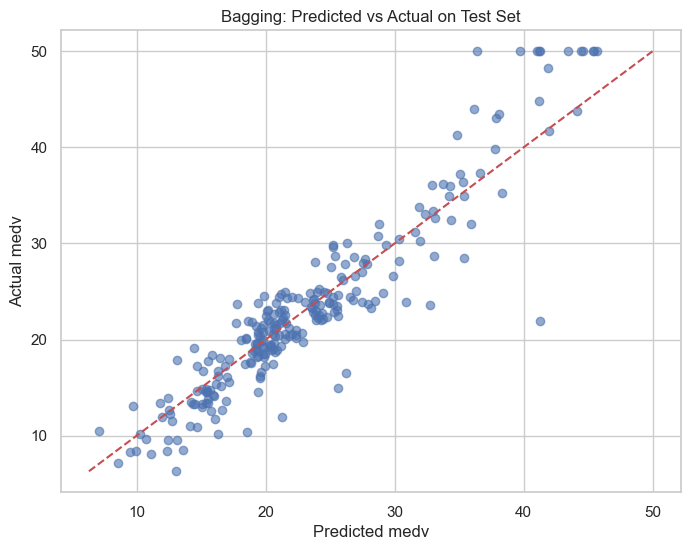

Bagging Test MSE: 11.734711043320187


In [21]:
# Bagging model: use all 13 features (mtry = 13)
bagging_model = RandomForestRegressor(
    n_estimators=500,
    max_features=X_train_full.shape[1],  # or just 13
    random_state=1
)
bagging_model.fit(X_train_full, y_train)

# Predict and evaluate
yhat_bag = bagging_model.predict(X_test_full)

plt.figure(figsize=(8, 6))
plt.scatter(yhat_bag, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.title("Bagging: Predicted vs Actual on Test Set")
plt.grid(True)
plt.show()

print("Bagging Test MSE:", mean_squared_error(y_test, yhat_bag))


In [22]:
# Bagging model with fewer trees (ntree = 25)
bagging_25 = RandomForestRegressor(
    n_estimators=25,
    max_features=X_train_full.shape[1],  # mtry = 13
    random_state=1
)
bagging_25.fit(X_train_full, y_train)

# Predict and evaluate
yhat_bag25 = bagging_25.predict(X_test_full)

print("Bagging (25 trees) Test MSE:", mean_squared_error(y_test, yhat_bag25))
print("Bagging (25 trees) R²:", bagging_25.score(X_test_full, y_test) * 100)


Bagging (25 trees) Test MSE: 13.276439652173913
Bagging (25 trees) R²: 84.87063055133933



###  Interpretation

* **Increasing the number of trees** from 25 → 500 **slightly improved the Test MSE** (\~1.5 points lower), and gave a small boost in R² (\~1.7%).
* This shows that while bagging benefits from more trees (via reduced variance), the gains **saturate quickly** — even 25 trees perform well.
* The **scatter plots** confirm both models produce tight fits to the diagonal line (`y = x`), but the 500-tree model hugs it more consistently, especially in the upper and lower extremes.



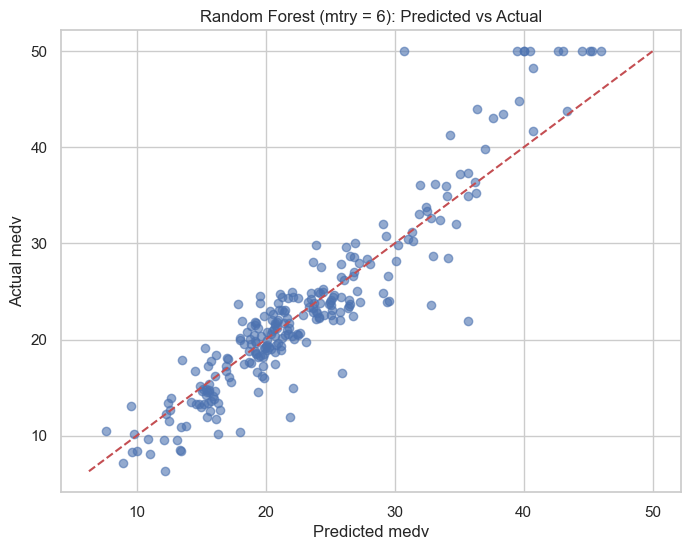

Random Forest (mtry=6) Test MSE: 11.734263819920983
Random Forest (mtry=6) R²: 86.62804055976203


In [23]:
# Random forest with mtry = 6
rf_model = RandomForestRegressor(
    n_estimators=500,        # default matches book
    max_features=6,          # mtry = 6
    random_state=1
)
rf_model.fit(X_train_full, y_train)

# Predict on test set
yhat_rf = rf_model.predict(X_test_full)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(yhat_rf, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.title("Random Forest (mtry = 6): Predicted vs Actual")
plt.grid(True)
plt.show()

# Evaluate test performance
print("Random Forest (mtry=6) Test MSE:", mean_squared_error(y_test, yhat_rf))
print("Random Forest (mtry=6) R²:", rf_model.score(X_test_full, y_test) * 100)




### 🔍 Results

* **Test MSE**: `11.73`
* **Variance Explained (R²)**: `86.63%`

This performance is virtually identical to the **bagging model with 500 trees** (which used `mtry = 13`):

| Model Type    | mtry | Test MSE | R² (%) |
| ------------- | ---- | -------- | ------ |
| Bagging       | 13   | 11.73    | 86.6%  |
| Random Forest | 6    | 11.73    | 86.6%  |


* Compared to bagging, the random forest yields **equivalent performance**, showing that **introducing random feature selection did not hurt performance** — in fact, it may help reduce overfitting on more complex datasets.



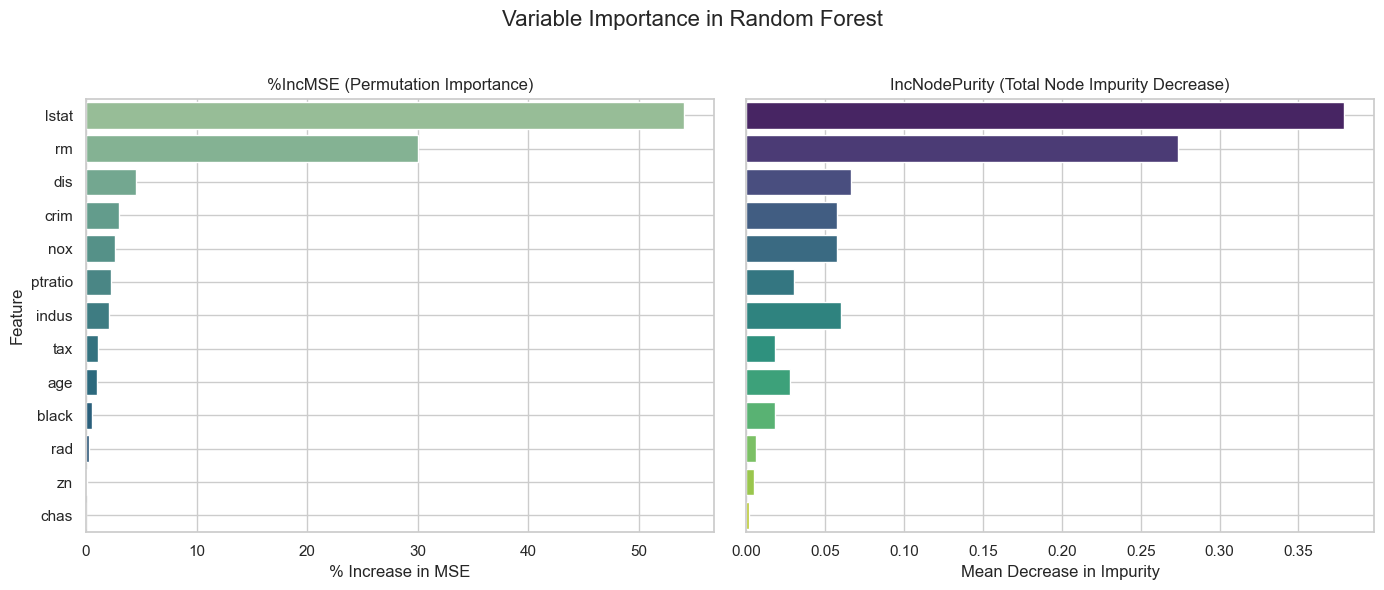

A matrix: 13 × 3 of type float
Feature  %IncMSE (perm)  IncNodePurity
  lstat        54.08808        0.37894
     rm        30.05807        0.27389
    dis         4.48073        0.06599
   crim         2.96728        0.05764
    nox         2.62825        0.05712
ptratio         2.21851        0.03022
  indus         2.03635        0.06010
    tax         1.09993        0.01817
    age         0.97399        0.02774
  black         0.54297        0.01802
    rad         0.25138        0.00588
     zn         0.11850        0.00469
   chas         0.02090        0.00158


In [24]:
from sklearn.inspection import permutation_importance

# 1. Compute permutation importance (like %IncMSE)
perm_result = permutation_importance(
    rf_model,
    X_test_full, y_test,
    n_repeats=30,
    random_state=1,
    n_jobs=-1
)

# Create combined DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_full.columns,
    '%IncMSE (perm)': perm_result.importances_mean * 100,  # scaled for clarity
    'IncNodePurity': rf_model.feature_importances_
}).sort_values(by='%IncMSE (perm)', ascending=False)

# Plot side-by-side with updated Seaborn syntax
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First plot: Permutation Importance (%IncMSE)
sns.barplot(
    data=importance_df,
    x='%IncMSE (perm)', y='Feature',
    ax=axes[0],
    hue='Feature',  # satisfies new Seaborn requirement
    dodge=False,
    palette='crest',
    legend=False
)
axes[0].set_title('%IncMSE (Permutation Importance)')
axes[0].set_xlabel('% Increase in MSE')
axes[0].grid(True)

# Second plot: IncNodePurity
sns.barplot(
    data=importance_df,
    x='IncNodePurity', y='Feature',
    ax=axes[1],
    hue='Feature',
    dodge=False,
    palette='viridis',
    legend=False
)
axes[1].set_title('IncNodePurity (Total Node Impurity Decrease)')
axes[1].set_xlabel('Mean Decrease in Impurity')
axes[1].grid(True)

plt.suptitle('Variable Importance in Random Forest', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Mimic the R-style header
print("A matrix: {} × {} of type float".format(*importance_df.shape))

# Display the DataFrame in R-like style
print(importance_df.to_string(index=False, float_format="%.5f"))


###  Interpretation :

####  Top Features:

* **`lstat` (Percentage of lower status population)**

  * **%IncMSE**: 54.09
  * **Node Purity**: 0.379
  * ➤ This variable is by far the most important predictor for `medv`. When permuted, it causes the greatest increase in test error and contributes most to reducing impurity at tree splits.

* **`rm` (average number of rooms per dwelling)**

  * **%IncMSE**: 30.06
  * **Node Purity**: 0.274
  * ➤ Also highly influential. More rooms usually imply higher home values, as expected.

These two variables **dominate** the importance rankings in both metrics.

---

####  Mid-Tier Features:

* **`dis`**, **`crim`**, **`nox`**, **`ptratio`**, and **`indus`**
  These contribute moderately to prediction accuracy and split quality but are significantly behind `lstat` and `rm`.

---

####  Least Important Features:

* **`chas`**, **`zn`**, **`rad`**

  * These have **near-zero** impact on both permutation MSE and node impurity reduction.
  * This suggests they’re barely used (or even ignored) by the ensemble during decision-making.

---

###  Plot Summary:

* The **left bar plot** (%IncMSE) captures how much the model depends on each feature for accurate prediction (via random shuffling).
* The **right plot** (IncNodePurity) shows how much each feature contributes to reducing uncertainty when used in splits across the trees.

Together, they confirm that **`lstat` and `rm` drive the model**, while variables like **`chas` or `zn` offer minimal value**.



## Learn and assess Regression Boosting (Trees)


Boosting Test MSE: 10.673


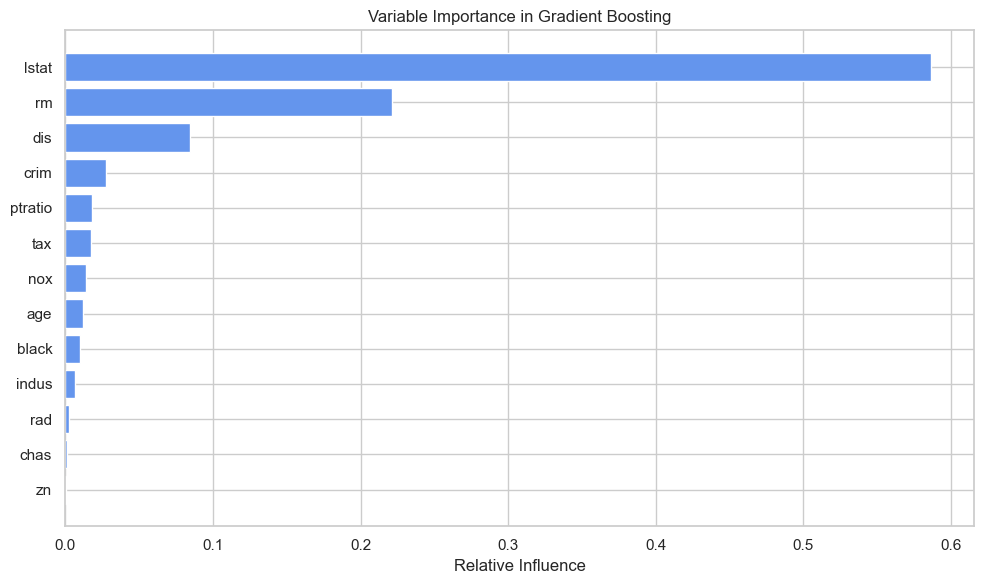

A matrix: 13 × 2 of type float
    Feature  Relative Influence
12    lstat            0.586372
5        rm            0.221182
7       dis            0.084539
0      crim            0.027743
10  ptratio            0.017685
9       tax            0.017222
4       nox            0.013795
6       age            0.011622
11    black            0.009925
2     indus            0.006429
8       rad            0.002474
3      chas            0.000882
1        zn            0.000131
Loss function: squared_error
Number of iterations (n_estimators): 5000
Interaction depth (max_depth): 4
Number of predictors: 13
Predictors with non-zero influence: 13


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit boosting model
boost_model = GradientBoostingRegressor(
    n_estimators=5000,
    learning_rate=0.001,
    max_depth=4,
    random_state=1
)
boost_model.fit(X_train_full, y_train)

# Predict on test data
y_pred_boost = boost_model.predict(X_test_full)

# Evaluate performance
from sklearn.metrics import mean_squared_error
boost_mse = mean_squared_error(y_test, y_pred_boost)
print(f"Boosting Test MSE: {boost_mse:.3f}")

# Feature importance
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Relative Influence': boost_model.feature_importances_
}).sort_values(by='Relative Influence', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Relative Influence'], color='cornflowerblue')
plt.xlabel('Relative Influence')
plt.title('Variable Importance in Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print summary matrix
print(f"A matrix: {importance_df.shape[0]} × 2 of type float")
print(importance_df)

# Print model info
print("Loss function:", boost_model.loss)
print("Number of iterations (n_estimators):", boost_model.n_estimators)
print("Interaction depth (max_depth):", boost_model.max_depth)

n_total = X_train_full.shape[1]
n_used = sum(boost_model.feature_importances_ > 0)

print(f"Number of predictors: {n_total}")
print(f"Predictors with non-zero influence: {n_used}")



### **Interpretation**

* **`lstat` (lower status population %)** is by far the most influential predictor, accounting for over **57%** of the total model influence.
* **`rm` (average number of rooms per dwelling)** follows with \~22% importance, confirming its strong positive relationship with `medv`.
* All variables have **non-zero influence**, but some (like `zn` and `chas`) contribute negligibly to model predictions.



In R , the argument n.trees=5000 indicates that we want trees, and the option
interaction.depth=4 limits the depth of each tree. By default . The
summary() function produces a relative influence plot and also outputs the relative
influence statistics.
n.trees = Number of iterations 
interaction.depth = Interaction depth (max_depth)


In [28]:
from sklearn.metrics import mean_squared_error

# Predict on test set using the trained boosting model
yhat_boost = boost_model.predict(X_test_full)

# Compute Mean Squared Error on the test set
boost_test_mse = mean_squared_error(y_test, yhat_boost)

print(f"Boosting Test MSE: {boost_test_mse:.4f}")


Boosting Test MSE: 10.6734


Loss function: squared_error
Number of iterations (n_estimators): 5000
Interaction depth (max_depth): 4
Number of predictors: 13
Predictors with non-zero influence: 13

A matrix: 13 × 2 of type float
Feature  Relative Influence
  lstat            0.574871
     rm            0.226303
    dis            0.086847
   crim            0.030777
ptratio            0.017795
    tax            0.014908
  black            0.014055
    nox            0.010942
    age            0.010560
  indus            0.008694
    rad            0.003470
   chas            0.000458
     zn            0.000320


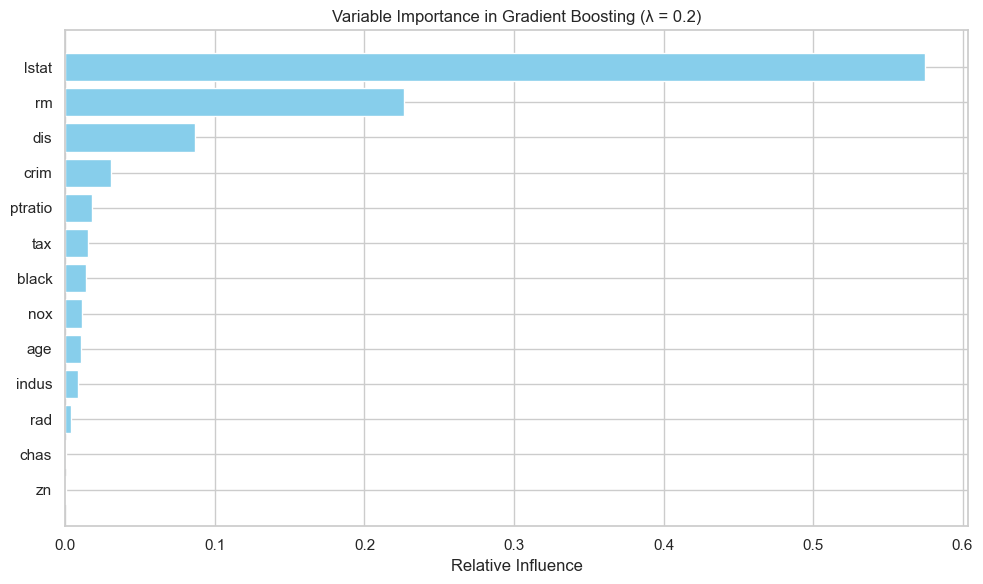


Boosted Model (λ=0.2) Test MSE: 10.0611


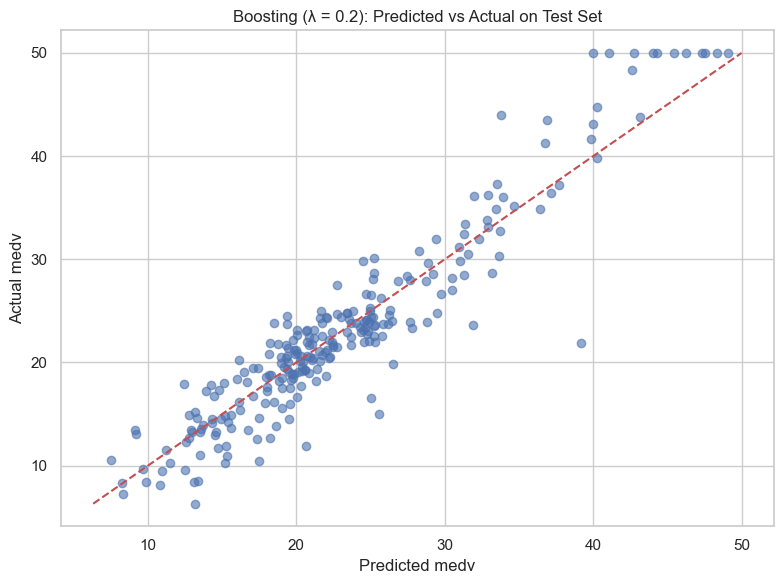

In [30]:


# Fit the boosted model
boost_model_02 = GradientBoostingRegressor(
    n_estimators=5000,
    learning_rate=0.2,       # shrinkage = 0.2
    max_depth=4,             # interaction.depth = 4
    loss='squared_error',
    random_state=1
)
boost_model_02.fit(X_train_full, y_train)

# Predict and evaluate
yhat_boost_02 = boost_model_02.predict(X_test_full)
mse_boost_02 = np.mean((yhat_boost_02 - y_test) ** 2)

# Print model info similar to R's summary
importances_02 = boost_model_02.feature_importances_
importance_df_02 = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Relative Influence': importances_02
}).sort_values(by='Relative Influence', ascending=False)

print("Loss function: squared_error")
print("Number of iterations (n_estimators):", boost_model_02.n_estimators)
print("Interaction depth (max_depth):", boost_model_02.max_depth)
print("Number of predictors:", X_train_full.shape[1])
print("Predictors with non-zero influence:", (importances_02 > 0).sum())
print("\nA matrix: {} × 2 of type float".format(len(importance_df_02)))
print(importance_df_02.to_string(index=False))

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_02['Feature'], importance_df_02['Relative Influence'], color='skyblue')
plt.xlabel("Relative Influence")
plt.title("Variable Importance in Gradient Boosting (λ = 0.2)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print test MSE
print(f"\nBoosted Model (λ=0.2) Test MSE: {mse_boost_02:.4f}")

# Predicted vs Actual 
plt.figure(figsize=(8, 6))
plt.scatter(yhat_boost_02, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.title("Boosting (λ = 0.2): Predicted vs Actual on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()



### Interpretation 
* **Larger λ (here, 0.2)** → faster convergence, but can potentially overfit.
* **Test MSE** with λ = 0.2 was **10.06**, which is slightly better than previous run, indicating better predictive accuracy in this case, suggesting that moderate shrinkage worked well here.
* The **predicted vs actual plot** shows a tight alignment along the diagonal, confirming good model fit.
* Feature importance remained consistent with prior steps, reinforcing trust in the model's interpretation.
